In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

from os import listdir
from os.path import isfile, join
import data_proses

In [3]:
dir_path = r'/home/robotics20/Documents/rotem/new_code/data/data'


In [4]:
full_df = data_proses.data_loder(dir_path=dir_path)

# fmg_index = ['S1','S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20','S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48']


In [5]:

full_df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,M1z,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z
1,25.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,24.0,25.0,...,-0.335338,0.992864,0.022049,-0.468929,1.096831,0.016345,-0.553149,1.316634,0.039465,-0.505000
2,26.0,25.0,24.0,24.0,25.0,25.0,24.0,25.0,25.0,24.0,...,-0.335338,0.992873,0.022037,-0.468924,1.096839,0.016350,-0.553153,1.316640,0.039457,-0.504999
3,26.0,25.0,24.0,25.0,24.0,25.0,25.0,26.0,25.0,24.0,...,-0.335338,0.992873,0.022037,-0.468924,1.096839,0.016350,-0.553153,1.316640,0.039457,-0.504999
4,26.0,24.0,24.0,24.0,24.0,24.0,23.0,23.0,21.0,24.0,...,-0.335338,0.992877,0.022036,-0.468920,1.096849,0.016346,-0.553148,1.316644,0.039451,-0.504998
5,25.0,25.0,24.0,24.0,25.0,24.0,24.0,25.0,26.0,24.0,...,-0.335338,0.992877,0.022036,-0.468920,1.096849,0.016346,-0.553148,1.316644,0.039451,-0.504998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,24.0,24.0,25.0,24.0,24.0,24.0,26.0,23.0,24.0,24.0,...,-0.335338,0.99281,0.022056,-0.468957,1.096803,0.016339,-0.553154,1.316624,0.039415,-0.505027
1990,30.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,25.0,24.0,...,-0.335338,0.992827,0.022057,-0.468954,1.096825,0.016307,-0.553170,1.316622,0.039393,-0.505031
1991,26.0,24.0,25.0,25.0,24.0,23.0,25.0,25.0,25.0,25.0,...,-0.335338,0.992846,0.022042,-0.468930,1.096821,0.016299,-0.553153,1.316636,0.039366,-0.505043
1992,25.0,24.0,22.0,25.0,24.0,24.0,23.0,24.0,24.0,26.0,...,-0.335338,0.992846,0.022018,-0.468924,1.096822,0.016307,-0.553165,1.316642,0.039361,-0.505042


In [6]:
fmg_df, imu_df, label_df  = data_proses.sepatare_data(full_df)

KeyError: 'sesion_time_stamp'

In [ ]:
df = pd.DataFrame(fmg_df['S43'],dtype=float).T
# pd.DataFrame(df.mean(numeric_only=False)).T 
df.mean(axis=1 , numeric_only=True)

S43    22.514271
dtype: float64

In [ ]:
time_stamp = fmg_df['sesion_time_stamp'].unique()
time_stamp

array(['03_May_2023_14:58', '03_May_2023_14:59'], dtype=object)

In [ ]:
bias_df = pd.DataFrame()
df = pd.DataFrame(fmg_df[fmg_df['sesion_time_stamp'] == time_stamp[0]].drop('sesion_time_stamp',axis=1),dtype=float).mean().to_frame().T
df['sesion_time_stamp'] = time_stamp[0]
bias_df = pd.concat([bias_df,df],axis= 0,ignore_index=False)
df2 = pd.DataFrame(fmg_df[fmg_df['sesion_time_stamp'] == time_stamp[1]].drop('sesion_time_stamp',axis=1),dtype=float).mean().to_frame().T
df2['sesion_time_stamp'] = time_stamp[1]


bias_df = pd.concat([bias_df,df2],axis= 0,ignore_index=False)
bias_df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S40,S41,S42,S43,S44,S45,S46,S47,S48,sesion_time_stamp
0,25.649083,24.376147,24.408257,24.332569,24.458716,24.399083,24.408257,24.389908,24.532110,24.357798,...,22.438073,22.527523,22.488532,22.561927,22.621560,22.529817,22.444954,22.513761,22.463303,03_May_2023_14:58
0,25.577835,24.358744,24.352979,24.348495,24.402306,24.402947,24.412556,24.423447,24.368994,24.368994,...,22.467008,22.461883,22.471493,22.500961,22.493914,22.525945,22.506726,22.532351,22.461243,03_May_2023_14:59


In [ ]:

df1 = fmg_df[fmg_df['sesion_time_stamp'] ==time_stamp[0]].drop('sesion_time_stamp',axis=1).astype(float)
df2 = bias_df[bias_df['sesion_time_stamp'] == time_stamp[0]].drop('sesion_time_stamp',axis=1).astype(float)

df1-np.array(df2)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48
1,0.350917,-0.376147,-0.408257,-1.332569,-0.458716,-0.399083,0.591743,-1.389908,-0.53211,0.642202,...,0.511468,-1.438073,-1.527523,-0.488532,-0.561927,-0.62156,0.470183,-2.444954,-0.513761,-0.463303
2,1.350917,-1.376147,-0.408257,-1.332569,-0.458716,0.600917,-0.408257,-0.389908,-1.53211,-0.357798,...,0.511468,0.561927,0.472477,0.511468,1.438073,0.37844,0.470183,1.555046,0.486239,0.536697
3,-0.649083,-0.376147,-0.408257,-0.332569,0.541284,-0.399083,-0.408257,-0.389908,-0.53211,-1.357798,...,0.511468,0.561927,1.472477,-0.488532,0.438073,0.37844,0.470183,0.555046,0.486239,0.536697
4,1.350917,0.623853,0.591743,-0.332569,0.541284,-0.399083,-0.408257,0.610092,0.46789,0.642202,...,-0.488532,-0.438073,-0.527523,-0.488532,0.438073,-0.62156,-0.529817,-0.444954,-0.513761,-0.463303
5,-0.649083,-0.376147,-0.408257,-0.332569,-0.458716,-0.399083,-0.408257,0.610092,-0.53211,0.642202,...,1.511468,-0.438073,-0.527523,0.511468,-0.561927,0.37844,-0.529817,-0.444954,0.486239,0.536697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.350917,0.623853,-0.408257,1.667431,-0.458716,0.600917,-0.408257,-0.389908,1.46789,-0.357798,...,-0.488532,-0.438073,0.472477,-0.488532,-0.561927,0.37844,-0.529817,-2.444954,-1.513761,0.536697
433,-0.649083,0.623853,-0.408257,-0.332569,1.541284,-0.399083,-0.408257,-1.389908,-0.53211,0.642202,...,-0.488532,0.561927,-0.527523,0.511468,0.438073,0.37844,0.470183,-0.444954,0.486239,0.536697
434,-0.649083,0.623853,0.591743,0.667431,-0.458716,-0.399083,0.591743,-0.389908,-0.53211,0.642202,...,0.511468,0.561927,0.472477,-0.488532,0.438073,1.37844,0.470183,-0.444954,-0.513761,0.536697
435,0.350917,0.623853,0.591743,-0.332569,0.541284,0.600917,-1.408257,-1.389908,-0.53211,-0.357798,...,0.511468,-1.438073,-1.527523,-0.488532,-0.561927,-1.62156,-0.529817,-0.444954,-1.513761,-0.463303


In [ ]:

fmg_df = data_proses.subtract_bias(fmg_df)

In [ ]:
data_proses.std_division(fmg_df)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S40,S41,S42,S43,S44,S45,S46,S47,S48,sesion_time_stamp
1,0.409585,-0.363299,-0.452989,-1.435646,-0.512670,-0.399285,0.632015,-1.491586,-0.568905,0.711708,...,-1.531935,-1.784687,-0.581580,-0.577870,-0.639795,0.459930,-2.471578,-0.550470,-0.529994,03_May_2023_14:58
2,1.576767,-1.329141,-0.452989,-1.435646,-0.512670,0.601222,-0.436041,-0.418432,-1.638055,-0.396523,...,0.598603,0.552020,0.608884,1.478875,0.389543,0.459930,1.571979,0.520981,0.613953,03_May_2023_14:58
3,-0.757598,-0.363299,-0.452989,-0.358294,0.604951,-0.399285,-0.436041,-0.418432,-0.568905,-1.504755,...,0.598603,1.720374,-0.581580,0.450503,0.389543,0.459930,0.561090,0.520981,0.613953,03_May_2023_14:58
4,1.576767,0.602544,0.656580,-0.358294,0.604951,-0.399285,-0.436041,0.654723,0.500244,0.711708,...,-0.466666,-0.616333,-0.581580,0.450503,-0.639795,-0.518262,-0.449799,-0.550470,-0.529994,03_May_2023_14:58
5,-0.757598,-0.363299,-0.452989,-0.358294,-0.512670,-0.399285,-0.436041,0.654723,-0.568905,0.711708,...,-0.466666,-0.616333,0.608884,-0.577870,0.389543,-0.518262,-0.449799,0.520981,0.613953,03_May_2023_14:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-1.686904,-0.402851,0.707008,-0.378221,-0.435158,-0.448439,1.818843,-1.509556,-0.414637,-0.411321,...,0.546000,-0.515992,0.562944,-0.511180,-0.524722,-0.554158,0.489804,-0.563841,-1.494218,03_May_2023_14:59
1995,4.727852,-0.402851,-0.385705,-0.378221,-0.435158,-0.448439,-0.472694,0.611431,0.709057,-0.411321,...,-0.478406,-0.515992,-0.502214,-0.511180,-0.524722,1.553127,0.489804,0.495312,0.550915,03_May_2023_14:59
1996,0.451348,-0.402851,0.707008,0.707079,-0.435158,-1.561336,0.673075,0.611431,0.709057,0.703387,...,-0.478406,0.601155,-0.502214,-0.511180,-0.524722,-1.607801,-0.503162,-0.563841,-1.494218,03_May_2023_14:59
1997,-0.617778,-0.402851,-2.571131,0.707079,-0.435158,-0.448439,-1.618462,-0.449062,-0.414637,1.818095,...,-3.551626,0.601155,-1.567372,0.509219,0.537653,-0.554158,-0.503162,-0.563841,-0.471652,03_May_2023_14:59


In [ ]:
label_df

,M1x,M1y,M1z,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z,sesion_time_stamp
1,0.834574,0.017551,-0.335338,0.992848,0.022065,-0.468950,1.096814,0.016339,-0.553153,1.316620,0.039467,-0.505002,03_May_2023_14:58
2,0.834574,0.017551,-0.335338,0.992848,0.022065,-0.468950,1.096814,0.016339,-0.553153,1.316620,0.039467,-0.505002,03_May_2023_14:58
3,0.834574,0.017551,-0.335338,0.992864,0.022049,-0.468929,1.096831,0.016345,-0.553149,1.316634,0.039465,-0.505000,03_May_2023_14:58
4,0.834574,0.017551,-0.335338,0.992864,0.022049,-0.468929,1.096831,0.016345,-0.553149,1.316634,0.039465,-0.505000,03_May_2023_14:58
5,0.834574,0.017551,-0.335338,0.992864,0.022049,-0.468929,1.096831,0.016345,-0.553149,1.316634,0.039465,-0.505000,03_May_2023_14:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.834574,0.017551,-0.335338,0.992810,0.022056,-0.468957,1.096803,0.016339,-0.553154,1.316624,0.039415,-0.505027,03_May_2023_14:59
1995,0.834574,0.017551,-0.335338,0.992827,0.022057,-0.468954,1.096825,0.016307,-0.553170,1.316622,0.039393,-0.505031,03_May_2023_14:59
1996,0.834574,0.017551,-0.335338,0.992846,0.022042,-0.468930,1.096821,0.016299,-0.553153,1.316636,0.039366,-0.505043,03_May_2023_14:59
1997,0.834574,0.017551,-0.335338,0.992846,0.022018,-0.468924,1.096822,0.016307,-0.553165,1.316642,0.039361,-0.505042,03_May_2023_14:59


In [ ]:
assert isinstance(fmg_df, pd.DataFrame),"fmg_df is not pd.dataframe"

In [ ]:
import models




In [ ]:
models.fully_conected()

In [ ]:
a = pd.DataFrame([[1,2],[2,2]])
b = pd.DataFrame([1,1])
a.sub(b,fill_value=1)

,0,1
0,0,1.0
1,1,1.0


In [ ]:
time.strftime("%d_%b_%Y_%H:%M", time.gmtime())

NameError: name 'time' is not defined

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/home/robotics20/Documents/rotem/new_code/data/data/14_Jun_2023_08_30.csv')




In [9]:
data.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31',
       'S32', 'M1x', 'M1y', 'M1z', 'M2x', 'M2y', 'M2z', 'M3x', 'M3y', 'M3z',
       'M4x', 'M4y', 'M4z', 'sesion_time_stamp'],
      dtype='object')

In [10]:
data.drop(['sesion_time_stamp'],axis=1)
data[['M1x', 'M1y', 'M1z', 'M2x', 'M2y', 'M2z', 'M3x', 'M3y', 'M3z',
       'M4x', 'M4y', 'M4z']]

,M1x,M1y,M1z,M2x,M2y,M2z,M3x,M3y,M3z,M4x,M4y,M4z
0,-1.459064,0.269518,0.505800,-1.809321,0.206055,0.396055,-1.544683,0.632032,0.583813,-1.777012,0.345985,0.518552
1,-1.459064,0.269518,0.505800,-1.809321,0.206055,0.396055,-1.544683,0.632032,0.583813,-1.777012,0.345985,0.518552
2,-1.458446,0.270313,0.506429,-1.809177,0.206541,0.395769,-1.544972,0.632456,0.585532,-1.776845,0.346336,0.518372
3,-1.457213,0.271852,0.507776,-1.808838,0.207658,0.395061,-1.545357,0.633155,0.588850,-1.776349,0.347049,0.518323
4,-1.430055,0.295913,0.538031,-1.799956,0.227502,0.385015,-1.552809,0.639412,0.643251,-1.768435,0.356290,0.520673
...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1.294638,0.355775,0.620144,-1.876026,0.591522,0.658809,-1.397340,0.642093,0.865865,-1.718065,0.566465,0.761786
195,-1.299106,0.355020,0.618777,-1.894909,0.597232,0.728915,-1.395062,0.644184,0.866916,-1.722265,0.571019,0.804882
196,-1.304236,0.354071,0.617275,-1.902521,0.592353,0.794904,-1.392983,0.645074,0.866899,-1.720264,0.566869,0.843794
197,-1.306755,0.353444,0.616209,-1.901851,0.584856,0.860629,-1.392475,0.646189,0.866068,-1.714176,0.561381,0.878809


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


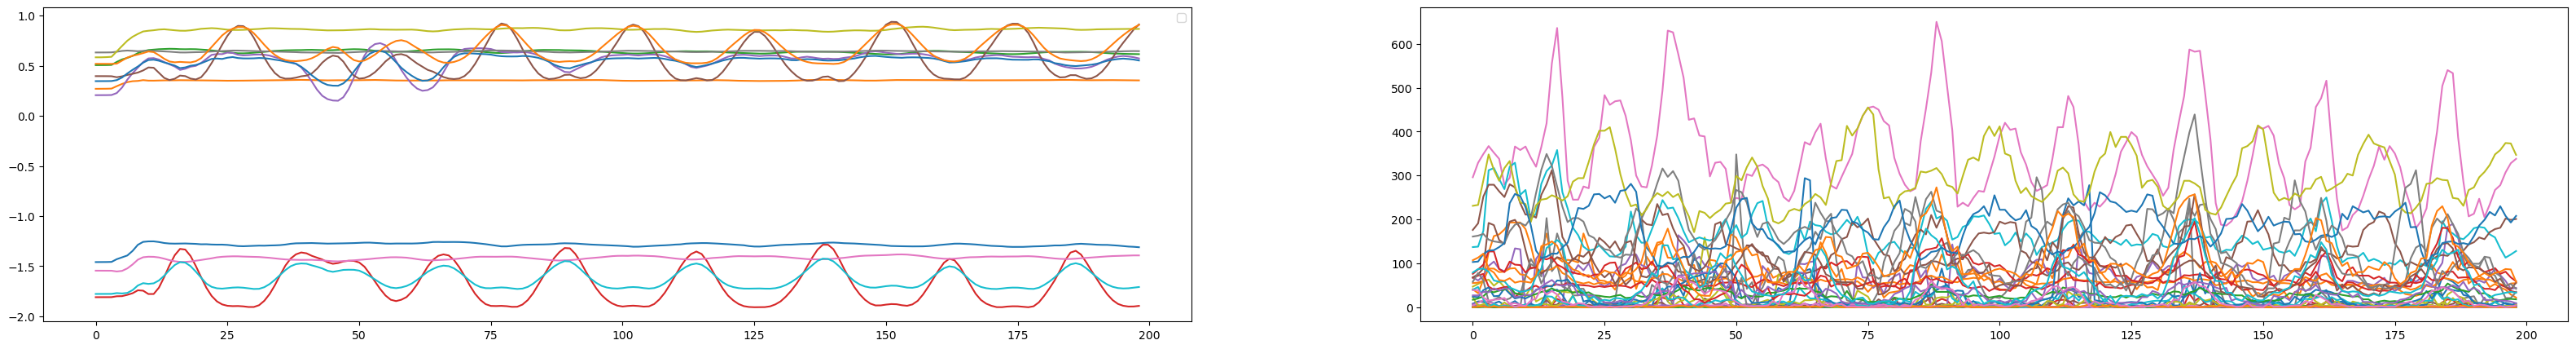

In [11]:
import matplotlib.pyplot as plt 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,5))

ax1.plot(data.drop(['sesion_time_stamp'],axis=1)[['M1x', 'M1y', 'M1z', 'M2x', 'M2y', 'M2z', 'M3x', 'M3y', 'M3z',
       'M4x', 'M4y', 'M4z']])
ax2.plot(data.drop(['sesion_time_stamp'],axis=1)[['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31',
       'S32']])
ax1.legend()

plt.show() 

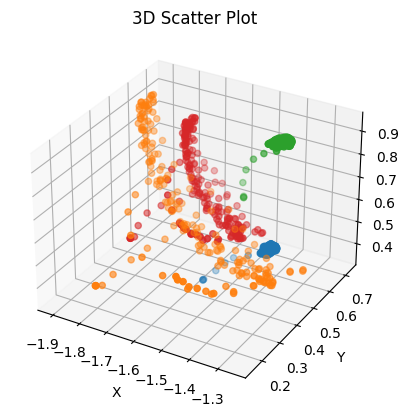

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # Load the data from the CSV file
# data = pd.read_csv('data.csv')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(data['M1x'], data['M1y'], data['M1z'])
ax.scatter(data['M2x'], data['M2y'], data['M2z'])
ax.scatter(data['M3x'], data['M3y'], data['M3z'])
ax.scatter(data['M4x'], data['M4y'], data['M4z'])

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib qt 

# Load the data from the CSV file
# data = pd.read_csv('data.csv')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axis limits
ax.set_xlim(data['M1x'].min(), data['M1x'].max())
ax.set_ylim(data['M1y'].min(), data['M1y'].max())
ax.set_zlim(data['M1z'].min(), data['M1z'].max())

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot Animation')

# Create the initial plot
scat = ax.scatter([], [], [])

# Define the update function
def update(i):
    # Update the data
    scat._offsets3d = (data['M2x'][:i], data['M2y'][:i], data['M2z'][:i])
    return scat,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, len(data)), interval=100)

# Show the plot
plt.show()
